<a href="https://colab.research.google.com/github/Vikashkrishna/AML_LAB/blob/main/2348571_prg3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Program_3a_Dataset.csv')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
features=['duration','age','campaign']
x=df[features]
y=df[['y']]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to numerical labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_resampled, y_resampled)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

train_predictions = model.predict(X_resampled)
train_accuracy = accuracy_score(y_resampled, train_predictions)

test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)

In [ ]:
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.74
Testing Accuracy: 0.79


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report on Test Set:')
print(classification_report(Y_test, test_predictions))



Classification Report on Test Set:
              precision    recall  f1-score   support

          no       0.95      0.80      0.87     10969
         yes       0.30      0.66      0.41      1388

    accuracy                           0.79     12357
   macro avg       0.62      0.73      0.64     12357
weighted avg       0.88      0.79      0.82     12357



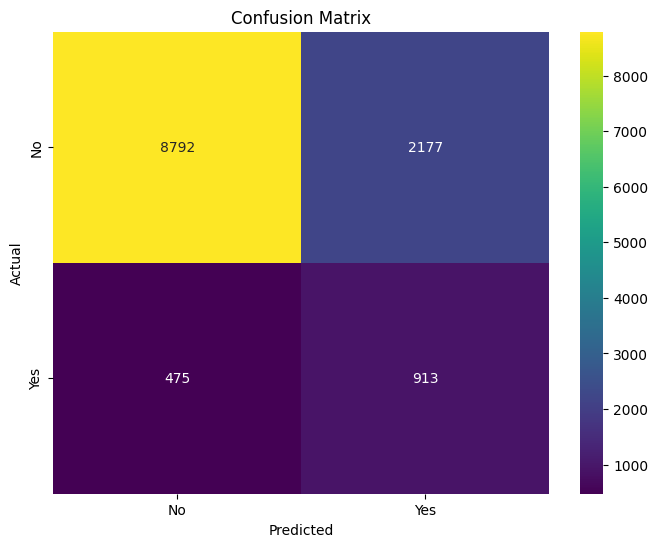

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(Y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


program 3b

In [ ]:
pf = pd.read_csv('/content/Program_3b_dataset.csv')

In [ ]:
pf.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
features=['variance', 'skewness', 'curtosis', 'entropy']
A=pf[features]
B=pf[['class']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size=0.3, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(report)


Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



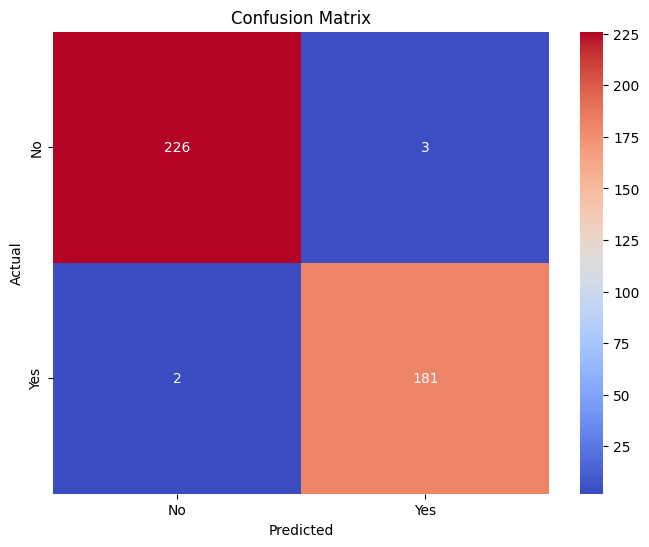

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
